# Creating final data for crop and fertilizer recommendation system

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
fertilizer_data_path = '../Data-raw/FertilizerData.csv'
merge_fert = pd.read_csv(fertilizer_data_path)

In [68]:
merge_fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,rice,80,40,40,5.5
1,1,maize,80,40,20,5.5
2,2,chickpea,40,60,80,5.5
3,3,kidneybeans,20,60,20,5.5
4,4,pigeonpeas,20,60,20,5.5


In [69]:
del merge_fert['Unnamed: 0']

In [70]:
merge_fert.describe()

,N,P,K,pH
count,44.000000,44.000000,44.000000,44.000000
mean,50.454545,45.681818,48.181818,5.409091
std,35.890955,32.252473,51.093745,0.583421
min,20.000000,10.000000,10.000000,4.000000
25%,20.000000,20.000000,20.000000,5.500000
50%,30.000000,40.000000,30.000000,5.500000
75%,80.000000,60.000000,50.000000,5.500000
max,120.000000,125.000000,200.000000,6.500000


In [71]:
merge_fert['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

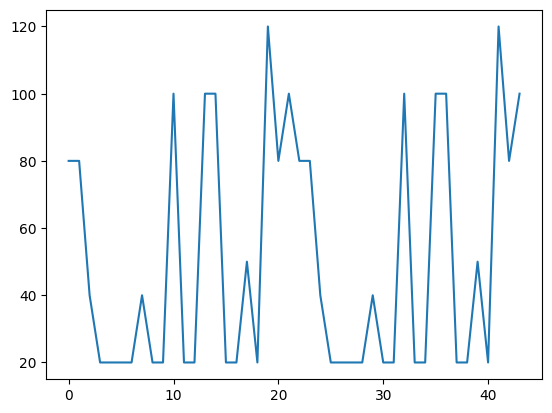

In [72]:
plt.plot(merge_fert["N"])

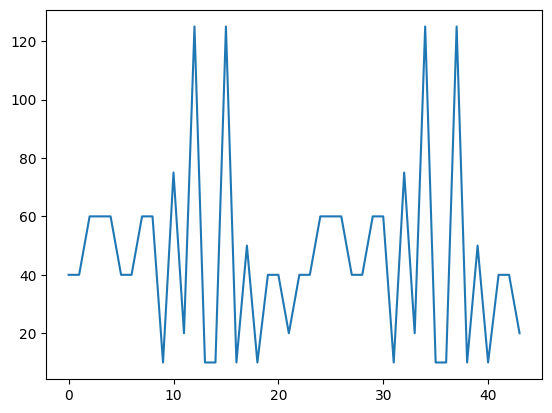

In [73]:
plt.plot(merge_fert["P"])

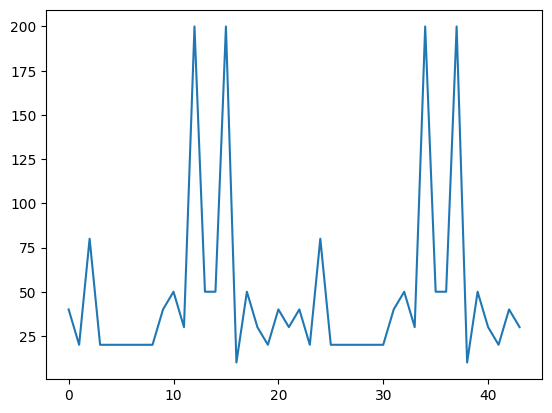

In [74]:
plt.plot(merge_fert["K"])

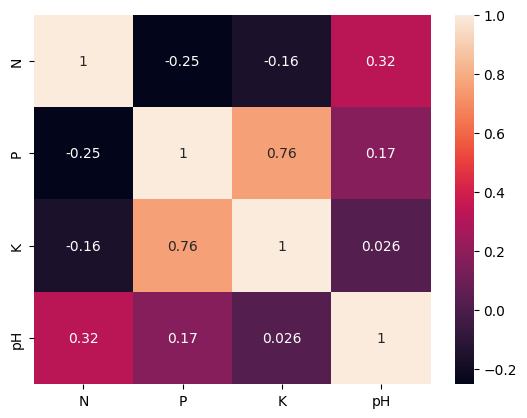

In [75]:
numeric_df = merge_fert.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


In [76]:
merge_crop = pd.read_csv('../Data-raw/MergeFileCrop.csv')
reco_fert = merge_fert

In [77]:
#Add +/-3 for every NPK value
import random
temp = pd.DataFrame(columns = ['N','P','K'])
for i in range(0,merge_crop.shape[0]):
    crop = merge_crop.label.iloc[i]
    #print(crop)
    N = reco_fert[reco_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20,20)
    P = reco_fert[reco_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5,20)
    K = reco_fert[reco_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5,5)
    d = {"N":N,"P":P,"K":K}
    #print(d)
    temp = temp.append(d,ignore_index = True)

In [78]:
temp

,N,P,K


In [79]:
merge_crop['N'] = temp['N']
merge_crop['P'] = temp['P']
merge_crop['K'] = temp['K']

In [80]:
merge_crop

,Unnamed: 0,temperature,humidity,ph,rainfall,label,N,P,K


In [81]:
# Assuming 'merge_crop' is your DataFrame
if 'Unnamed: 1' in merge_crop.columns:
    del merge_crop['Unnamed: 1']
else:
    print("Column 'Unnamed: 1' does not exist in the DataFrame.")


Column 'Unnamed: 1' does not exist in the DataFrame.


In [82]:
merge_crop

,Unnamed: 0,temperature,humidity,ph,rainfall,label,N,P,K


In [83]:
merge_crop = merge_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [84]:
merge_crop.to_csv("../Data-processed/crop_recommendation.csv",index=False)

In [85]:
# Checking if everything went fine
df = pd.read_csv('../Data-processed/crop_recommendation.csv')

In [86]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label


In [87]:
df.shape

(0, 8)